In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CORDIS

## 1. Data loading and preprocessing

In [3]:
# Load data
cordish2020 = pd.read_csv("data/cordis/cordis-h2020projects.csv",sep=";",decimal=",")
cordisfp7 = pd.read_csv("data/cordis/cordis-fp7projects.csv",sep=";",decimal=",")
#cordisfp6 = pd.read_csv("data/cordis/cordis-fp6projects.csv",sep=";",decimal=",")
cordisfp5 = pd.read_csv("data/cordis/cordis-fp5projects.csv",sep=";",decimal=",")

In [4]:
# Shapes
print("H2020 (2014-2020): ",cordish2020.shape)
print("FP7 (2007-2013): ",cordisfp7.shape)
# print("FP6 (2002-2006): ",cordisfp6.shape) # 10082
print("FP5 (1998-2002): ",cordisfp5.shape)

H2020 (2014-2020):  (32161, 21)
FP7 (2007-2013):  (25778, 21)
FP5 (1998-2002):  (17205, 21)


In [5]:
# Append data
cordis = cordish2020.append(cordisfp7)
#cordis = cordis.append(cordisfp6)
cordis = cordis.append(cordisfp5)
cordis.shape

(75144, 21)

In [6]:
# Cast dates to datetime format
cordis['startDate'] = pd.to_datetime(cordis['startDate'])
cordis['endDate'] = pd.to_datetime(cordis['endDate'])

# Compute duration in days
cordis['duration_days'] = (cordis['endDate'] - cordis['startDate']).dt.days

# Extract start and end years and store in new column of dataframe
cordis['startYear'] = pd.DatetimeIndex(cordis['startDate']).year
cordis['endYear'] = pd.DatetimeIndex(cordis['endDate']).year

In [7]:
# Remove useless columns
cordis = cordis.drop(columns=['startDate','endDate','subjects'])

In [9]:
#cordis.dtypes

In [10]:
#cordis.head()

In [232]:
#cordis.to_csv('corpus.csv',columns=['objective'],index=False)

## 2. Descriptive analysis

### Status
- ONG: ongoing
- SIGNED: firmado
- CLOSED: cerrado (¿sin terminar?)
- CLO: ¿=closed?
- TERMINATED: terminado (¿finalizado?)
- CAN: ¿?

In [13]:
cordis['status'].value_counts()

ONG           23442
SIGNED        20559
CLOSED        11178
CLO            1969
TERMINATED      424
CAN             179
Name: status, dtype: int64

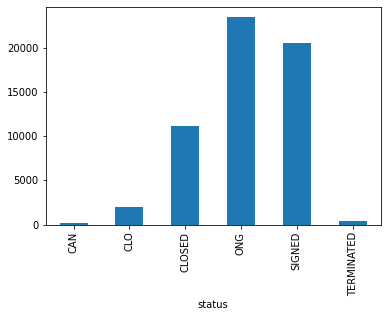

In [14]:
cordis.groupby('status')['id'].nunique().plot(kind='bar')
plt.show()

### Topics

In [15]:
cordis['topics'].value_counts()

EIC-SMEInst-2018-2020           2439
MSCA-IF-2019                    1482
MSCA-IF-2018                    1373
MSCA-IF-2017                    1367
MSCA-IF-2016                    1253
                                ... 
MG-4.3-2017                        1
JTI-CS2-2014-CFP01-LPA-02-06       1
JTI-CS2-2016-CFP03-SYS-02-16       1
JTI-CS-2010-3-SFWA-01-024          1
HEALTH.2013.2.3.3-1                1
Name: topics, Length: 8048, dtype: int64

In [16]:
#cordis.groupby('topics')['id'].nunique().plot(kind='bar')
#plt.show()

### Start and end dates

In [17]:
cordis['startYear'].value_counts()

2019.0    5551
2000.0    5224
2018.0    5064
2015.0    5038
2017.0    4978
2016.0    4955
2001.0    4912
2013.0    4562
2020.0    4484
2002.0    4446
2012.0    4332
2011.0    3966
2010.0    3602
2014.0    3335
2009.0    2901
2008.0    2826
2021.0    2034
2003.0    1287
1999.0     614
2007.0     175
1995.0      80
2004.0      69
2005.0      59
2006.0      28
1996.0      19
1988.0      18
2022.0      17
1989.0      15
1990.0       6
1997.0       3
1998.0       2
Name: startYear, dtype: int64

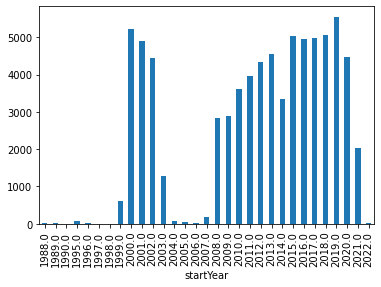

In [18]:
cordis.groupby('startYear')['id'].nunique().plot(kind='bar')
plt.show()

In [19]:
cordis['endYear'].value_counts()

2021.0    5149
2018.0    5112
2016.0    4999
2019.0    4934
2017.0    4906
2015.0    4726
2022.0    4694
2004.0    3748
2020.0    3627
2014.0    3616
2003.0    3475
2023.0    3322
2013.0    3179
2002.0    2947
2012.0    2649
2005.0    2225
2011.0    2035
2024.0    1873
2001.0    1631
2025.0    1202
2006.0    1160
2010.0    1061
2000.0     557
2026.0     430
2009.0     205
2007.0     166
1999.0     109
2008.0      88
2062.0      17
2027.0      16
2035.0      12
2032.0      12
2031.0       6
2037.0       4
2033.0       4
2064.0       3
2059.0       3
2054.0       3
2030.0       3
2040.0       3
2070.0       2
2065.0       2
2061.0       2
2047.0       2
2046.0       1
2028.0       1
1990.0       1
2063.0       1
2045.0       1
2057.0       1
2055.0       1
Name: endYear, dtype: int64

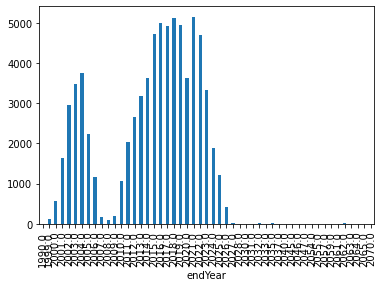

In [20]:
cordis.groupby('endYear')['id'].nunique().plot(kind='bar')
plt.show()

In [21]:
cordis['duration_days'].mean()

1087.5918350783215

array([[<AxesSubplot:title={'center':'duration_days'}>]], dtype=object)

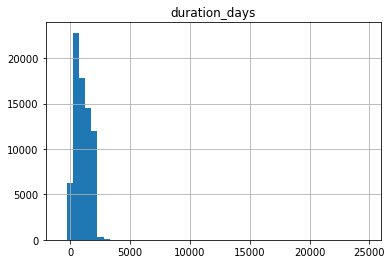

In [22]:
cordis.hist(column='duration_days',bins=50)

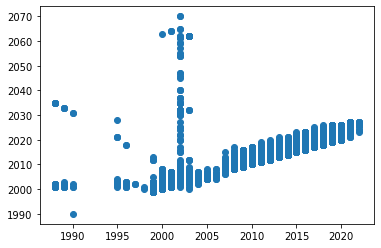

In [24]:
plt.scatter(cordis['startYear'],cordis['endYear'])

### Total cost

In [25]:
cordis['totalCost'].mean()

2188865.843434274

array([[<AxesSubplot:title={'center':'totalCost'}>]], dtype=object)

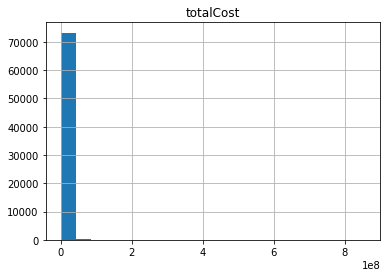

In [26]:
cordis.hist(column='totalCost',bins=20)

In [27]:
cordis['ecMaxContribution'].mean()

1617052.9677372274

array([[<AxesSubplot:title={'center':'ecMaxContribution'}>]], dtype=object)

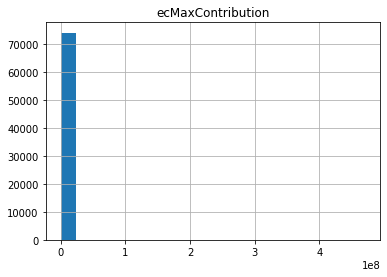

In [28]:
cordis.hist(column='ecMaxContribution',bins=20)

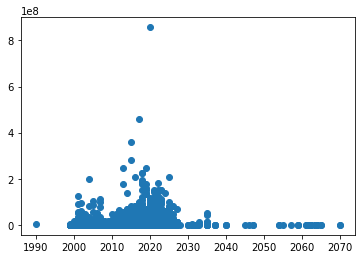

In [29]:
plt.scatter(cordis['endYear'],cordis['totalCost'])

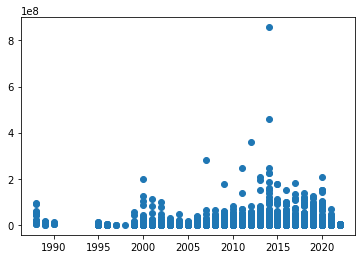

In [30]:
plt.scatter(cordis['startYear'],cordis['totalCost'])

### Coordinator country

In [31]:
cordis['coordinatorCountry'].value_counts()

UK    13327
DE     9155
FR     8070
ES     7508
IT     6490
      ...  
GL        1
UZ        1
SY        1
TZ        1
KG        1
Name: coordinatorCountry, Length: 95, dtype: int64

In [35]:
heatmap_country_year_budget = pd.pivot_table(data=cordis,index='coordinatorCountry',values='totalCost',columns='endYear')
heatmap_country_year_budget.head()

endYear,1990.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,...,2054.0,2055.0,2057.0,2059.0,2061.0,2062.0,2063.0,2064.0,2065.0,2070.0
coordinatorCountry,,,,,,,,,,,,,,,,,,,,,
AE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='endYear', ylabel='coordinatorCountry'>

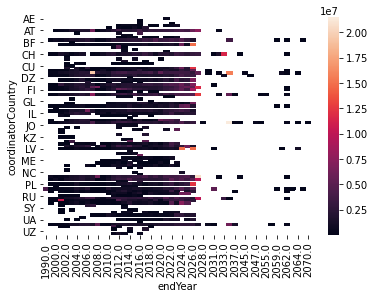

In [36]:
sns.heatmap(heatmap_country_year_budget)

# MALLET

In [37]:
from customMallet import CustomMallet

In [38]:
corpus_list = cordis['objective'].tolist()
# corpus_raw = list(map(lambda x: x['objective'], corpus_list))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
testmallet = CustomMallet()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
testmallet.corpus2doctopic(corpus_list,10)